# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [78]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [79]:
# Checking the number of mice.
mouse_total = mouse_data['Mouse ID'].nunique()
mouse_total

249

In [80]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mouse = mouse_data.loc[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mouse

array(['g989'], dtype=object)

In [81]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_mouse = mouse_data.loc[mouse_data['Mouse ID'] == 'g989']
g989_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [82]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study = mouse_data[mouse_data['Mouse ID'].isin(dup_mouse)==False]

# check the table to verify the duplicate mice are dropped
# mouse_study.loc[mouse_study['Mouse ID'] == 'g989']
# mouse_study

In [83]:
# Checking the number of mice in the clean DataFrame.
mouse_clean_total = mouse_study['Mouse ID'].nunique()
mouse_clean_total

248

## Summary Statistics

In [84]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean = mouse_study['Tumor Volume (mm3)'].groupby(mouse_study['Drug Regimen']).mean()
median = mouse_study['Tumor Volume (mm3)'].groupby(mouse_study['Drug Regimen']).median()
var = mouse_study['Tumor Volume (mm3)'].groupby(mouse_study['Drug Regimen']).var()
std = mouse_study['Tumor Volume (mm3)'].groupby(mouse_study['Drug Regimen']).std()
sem = mouse_study['Tumor Volume (mm3)'].groupby(mouse_study['Drug Regimen']).sem()

mouse_stats = pd.DataFrame({"Mean Tumor Volume": mean,
                            "Median Tumor Volume": median,
                            "Tumor Volume Variance": var,
                            "Tumor Volume Std. Dev.": std,
                            "Tumor Volume Std. Err.": sem})
mouse_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [85]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_summ = mouse_study.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
mouse_summ

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

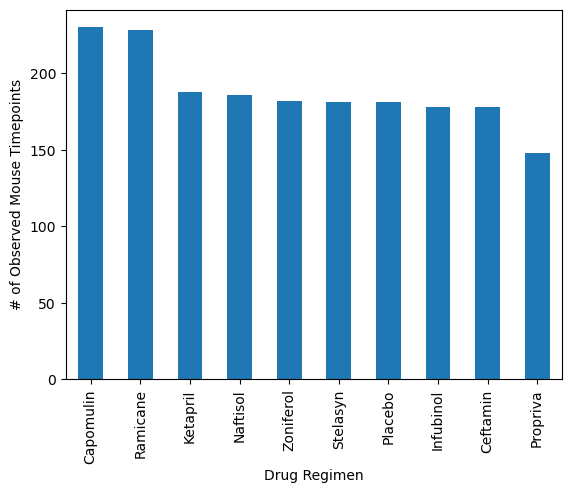

In [86]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_drug = mouse_study['Drug Regimen'].value_counts()
py_bar = mouse_drug.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints')

plt.show()

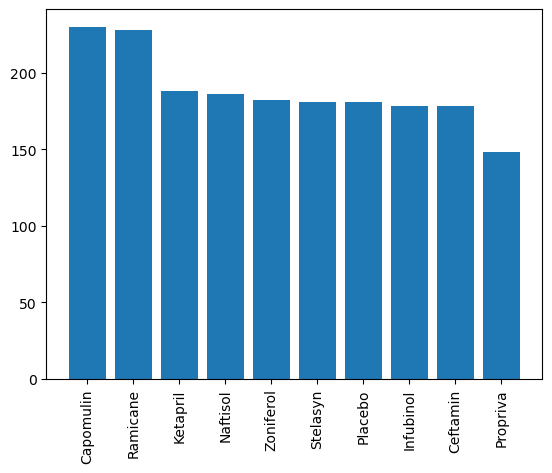

In [87]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = np.arange(len(mouse_drug))
drug_name = list(mouse_drug.index)
plt.bar(x_axis, mouse_drug)
tick_loc = [value for value in x_axis]
plt.xticks(tick_loc, drug_name, rotation=90)
plt.show()

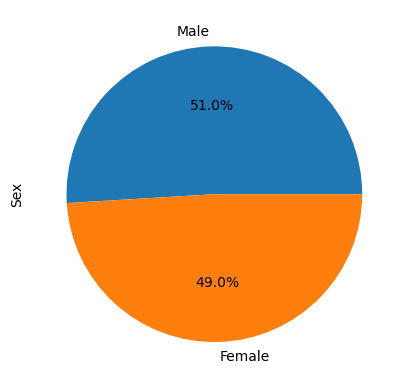

In [88]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex = mouse_study['Sex'].value_counts()
py_pie = sex.plot(kind='pie', y=sex, autopct='%.1f%%')
plt.show()

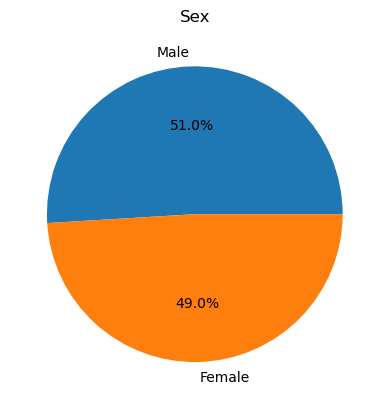

In [89]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
label = list(sex.index)
plt.pie(sex, labels=label, autopct='%.1f%%')
plt.title('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [90]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
last_time = mouse_study.groupby(['Mouse ID'])['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tx_max = pd.merge(last_time, mouse_study, on=('Mouse ID', 'Timepoint'), how='inner')
tx_df = tx_max.loc[(tx_max['Drug Regimen'] == 'Capomulin')|
                   (tx_max['Drug Regimen'] == 'Ramicane')|
                   (tx_max['Drug Regimen'] == 'Infubinol')|
                   (tx_max['Drug Regimen'] == 'Ceftamin')]

tx_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
238,y769,45,68.594745,4,Ceftamin,Female,6,27
239,y793,45,31.896238,2,Capomulin,Male,17,17
240,y865,45,64.729837,3,Ceftamin,Male,23,26
244,z578,45,30.638696,0,Ramicane,Male,11,16


In [91]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
def calc(data):
    quartiles = data.quantile([0.25, 0.5, 0.75])
    low = quartiles[0.25]
    up = quartiles[0.75]
    iqr = up - low
    median = quartiles[0.5]
    low_b = low - (1.5 * iqr)
    up_b = up + (1.5 * iqr)
    return low, up, iqr, median, low_b, up_b
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    data = tx_df.loc[tx_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # add subset 
    low_q, up_q, iqr_d, median_d, low_b_d, up_b_d = calc(data)
    
    tumor_vol[treatment] = {
        'lower quartile': low_q,
        'upper quartile': up_q,
        'iqr': iqr_d,
        'median': median_d,
        'lower bound': low_b_d,
        'upper bound': up_b_d
    }
  
    # Determine outliers using upper and lower bounds
for treatment, stats in tumor_vol.items():
    print(f"Drug Regimen: {treatment}")
    print(f"Lower Quartile: {stats['lower quartile']}")
    print(f"Upper Quartile: {stats['upper quartile']}")
    print(f"IQR: {stats['iqr']}")
    print(f"Median: {stats['median']}")
    print(f"Lower Bound: {stats['lower bound']}")
    print(f"Upper Bound: {stats['upper bound']}")

Drug Regimen: Capomulin
Lower Quartile: 32.37735684
Upper Quartile: 40.1592203
IQR: 7.781863460000004
Median: 38.1251644
Lower Bound: 20.70456164999999
Upper Bound: 51.83201549
Drug Regimen: Ramicane
Lower Quartile: 31.56046955
Upper Quartile: 40.65900627
IQR: 9.098536719999998
Median: 36.56165229
Lower Bound: 17.912664470000003
Upper Bound: 54.30681135
Drug Regimen: Infubinol
Lower Quartile: 54.04860769
Upper Quartile: 65.52574285
IQR: 11.477135160000003
Median: 60.16518046
Lower Bound: 36.83290494999999
Upper Bound: 82.74144559000001
Drug Regimen: Ceftamin
Lower Quartile: 48.72207785
Upper Quartile: 64.29983003
IQR: 15.577752179999997
Median: 59.85195552
Lower Bound: 25.355449580000002
Upper Bound: 87.66645829999999


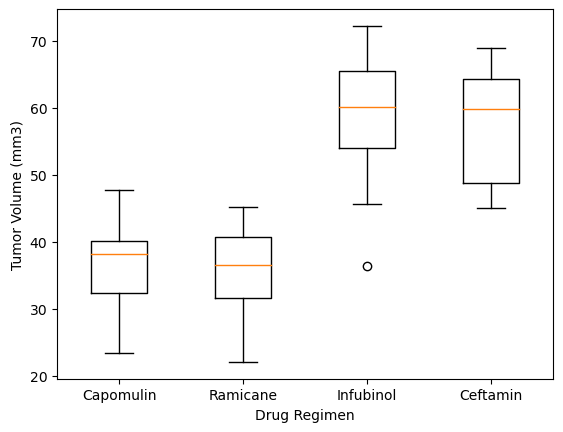

In [92]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drug_box = [tx_df[tx_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)'] for treatment in treatments]
fig1, ax = plt.subplots()
plt.boxplot(drug_box, labels=treatments)
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

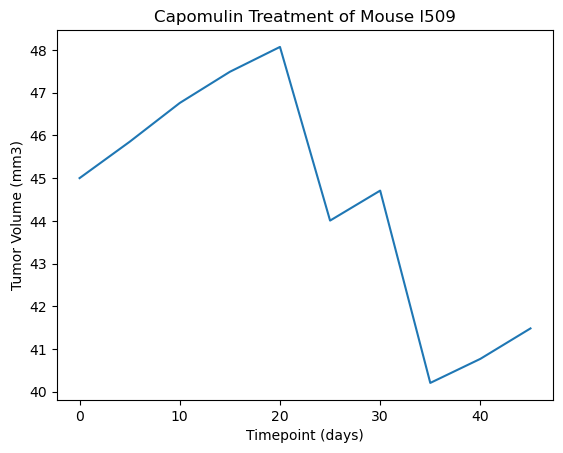

In [93]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# turn timepoint and tumor vol into lists
l509 = mouse_study.loc[mouse_study['Mouse ID'] == 'l509']
l509_df= l509[['Timepoint', 'Tumor Volume (mm3)']]
l509_time = list(l509['Timepoint'])
l509_vol = list(l509['Tumor Volume (mm3)'])

# the plot
plt.plot(l509_time, l509_vol)
plt.title('Capomulin Treatment of Mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

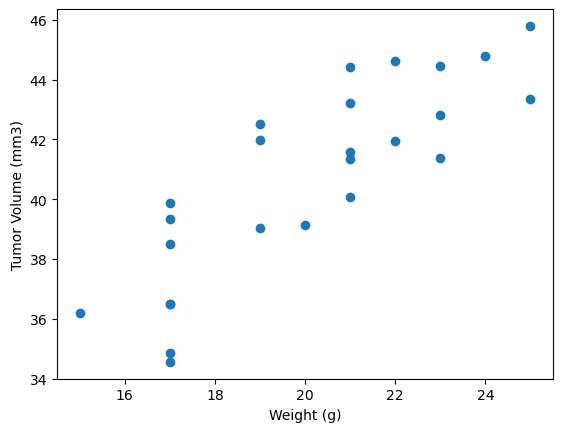

In [94]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# take the avg weight and tumor vol for all mice that took capomulin
cap = mouse_study.loc[mouse_study['Drug Regimen'] == 'Capomulin']
avg_cap = cap.groupby(['Mouse ID']).mean(numeric_only=True)

# plot
plt.scatter(avg_cap['Weight (g)'], avg_cap['Tumor Volume (mm3)'], marker='o')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


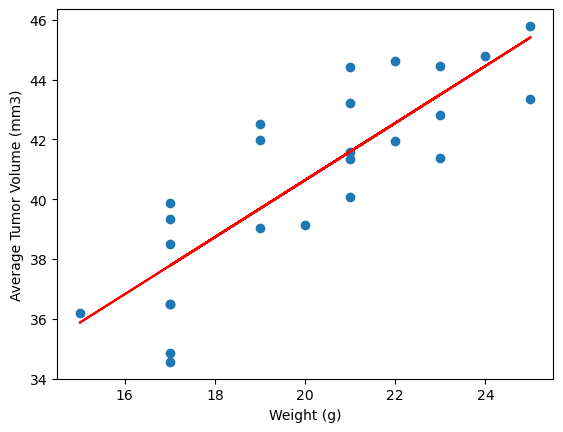

In [95]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# correlation
correlation = st.pearsonr(avg_cap['Weight (g)'], avg_cap['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")

# linear regression
slope, intercept, rvalue, pvalue, stderr = st.linregress(avg_cap['Weight (g)'], avg_cap['Tumor Volume (mm3)'])
regression = slope * avg_cap['Weight (g)'] + intercept

# plot
plt.scatter(avg_cap['Weight (g)'], avg_cap['Tumor Volume (mm3)'], marker='o')
plt.plot(avg_cap['Weight (g)'], regression, 'r-')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()
